In [12]:
import pandas as pd,numpy as np, matplotlib.pyplot as plt, seaborn as sns
import joblib
df = pd.read_csv('CAR DETAILS.csv')

In [13]:
df.head(1)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner


In [9]:
df['name'][df['km_driven']>900000]

Series([], Name: name, dtype: object)

In [11]:
df[df['km_driven']==806599]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
1243,Maruti Swift VXI BSIII,2009,250000,806599,Petrol,Dealer,Manual,First Owner


In [7]:
df['km_driven'].describe(percentiles=(.75,.80,.85,.90))

count      4340.000000
mean      66215.777419
std       46644.102194
min           1.000000
50%       60000.000000
75%       90000.000000
80%      100000.000000
85%      110000.000000
90%      120000.000000
max      806599.000000
Name: km_driven, dtype: float64

In [ ]:
df[['']]

### Data Preproessing

In [14]:
df.shape

(4340, 8)

In [15]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [17]:
# Remove duplicates
df.duplicated().sum()
df.drop_duplicates(inplace = True)
df.shape

(3577, 8)

In [18]:
# Extract seperate features for "model" and "varient" of cars

df['model'] = df['name'].apply(lambda x: x.split(' ')[1])
df['varient'] = df['name'].apply(lambda x: x.split(' ',3)[-1])
df['name'] = df['name'].apply(lambda x: x.split(' ',1)[0])
df.drop(['varient'],axis = 1,inplace = True)

In [8]:
df.nunique()

name              29
year              27
selling_price    445
km_driven        770
fuel               5
seller_type        3
transmission       2
owner              5
model            185
dtype: int64

In [19]:
cont_ = df.columns[df.dtypes != 'object']
cat_ = df.columns[df.dtypes == 'object'].drop(['model']) # ['model'] has been dropped because it needs further encoding

In [10]:
def plot_(df, cat_):
  plt.figure(figsize =(13,10))
  for i in range(len(cat_)):
    plt.subplot(3,3,i+1)
    plt.hist(df[cat_[i]])
    plt.xticks(rotation = 90)
    max_value = df[cat_[i]].value_counts().max()
    plt.yticks(ticks = range(0,max_value+100,100))
    plt.title(cat_[i])

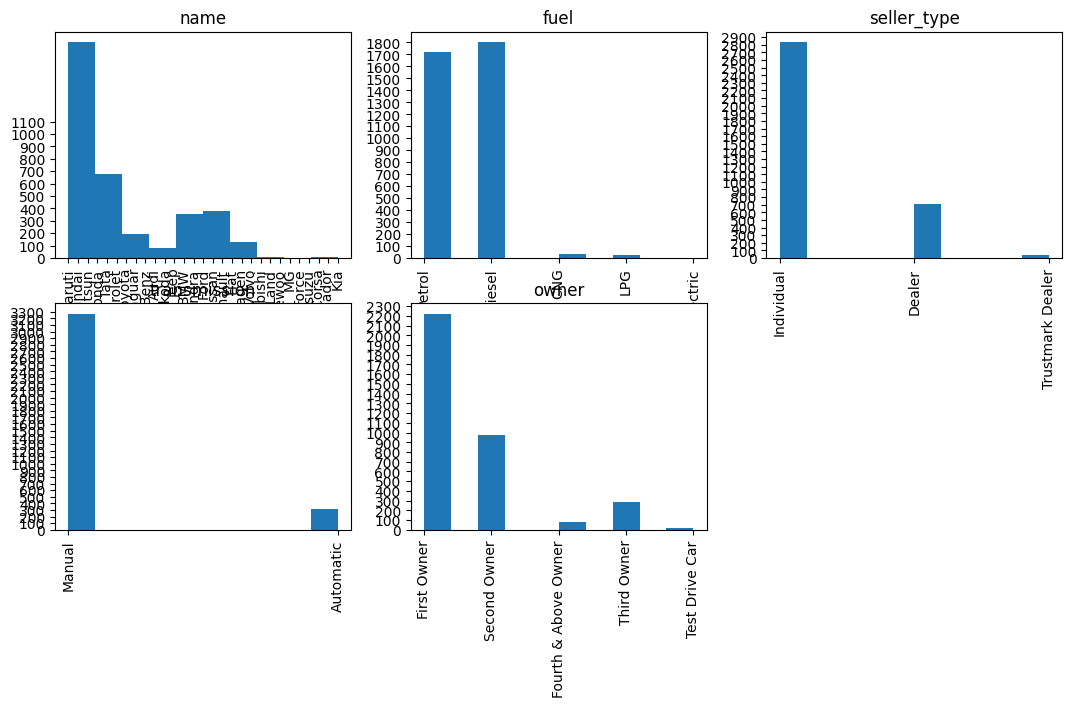

In [11]:
plot_(df, cat_)

In [20]:
# Merging less categorical values in a common category

df['fuel'] = df['fuel'].replace(['CNG','LPG','Electric'],'Others')
df['seller_type'] = df['seller_type'].replace('Trustmark Dealer','Dealer')
df['owner'].unique()
df['owner'] = df['owner'].replace({'Fourth & Above Owner':'Third & Above Owner','Third Owner':'Third & Above Owner', 'Test Drive Car':'First Owner'})

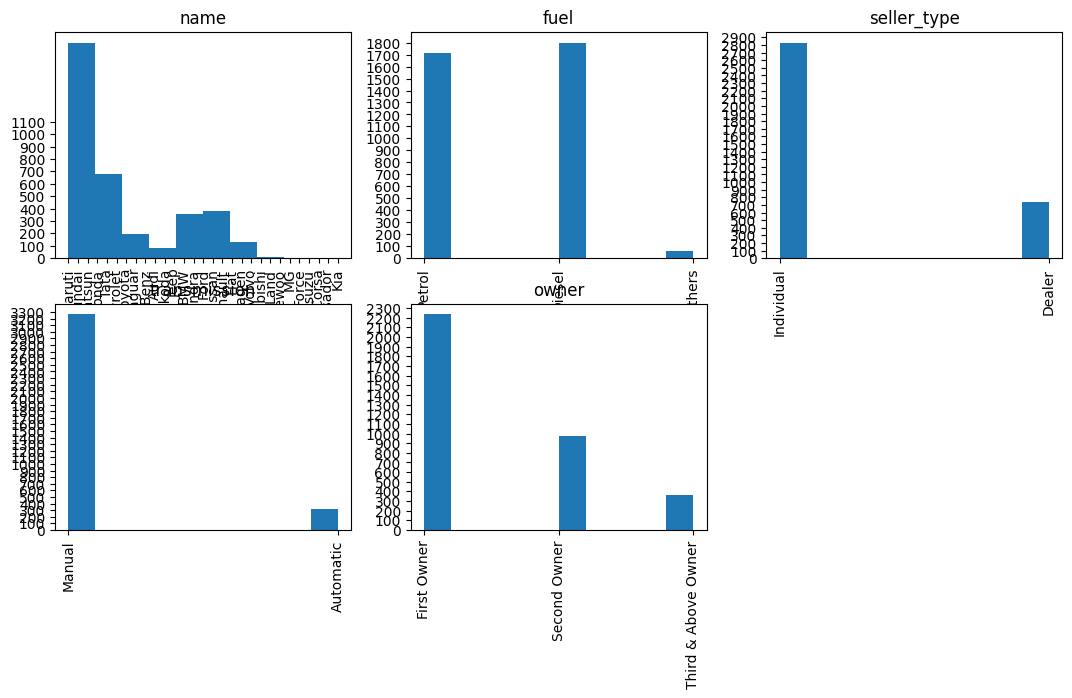

In [13]:
plot_(df, cat_)

In [14]:
def plot_1(df,col):
  plt.figure(figsize =(6,5))
  x = plt.hist(df[col],bins = df[col].nunique())
  plt.bar_label(x[2])
  plt.xticks(rotation = 90)
  plt.title(col)
  max_value = df[col].value_counts().max()
  plt.yticks(ticks = range(0,max_value+1,50),labels =range(0,max_value+1,50))
  plt.show()

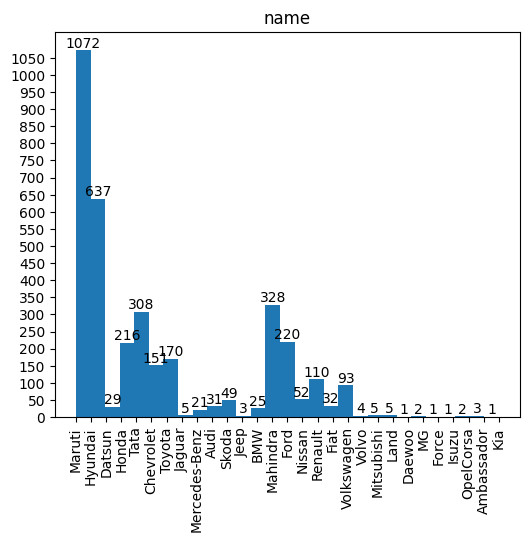

In [15]:
plot_1(df,'name')

In [21]:
## Reducing categories in "Name" column

value_counts = df['name'].value_counts()
df['name'] = df['name'].replace(value_counts[value_counts < 100].index,'Others')

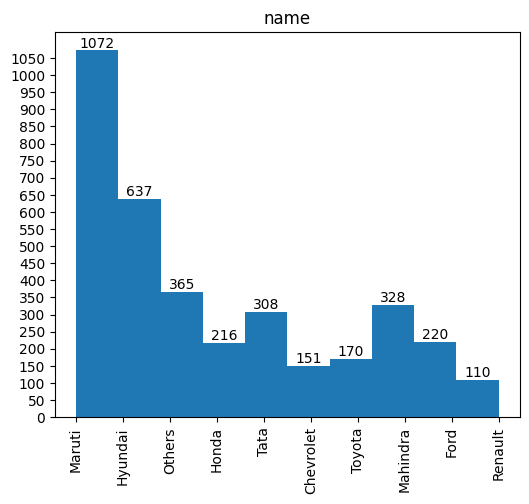

In [17]:
plot_1(df,'name')

## EDA

In [18]:
def uni_(df,col):
  plt.figure(figsize=(6,5))
  df[col].plot(kind='hist', bins= df[col].nunique(), title=col)
  plt.gca().spines[['top', 'right',]].set_visible(False)
  y = df[col].value_counts(ascending = True).index
  plt.xticks(ticks = y,rotation = 90)
  plt.grid()
  plt.show()

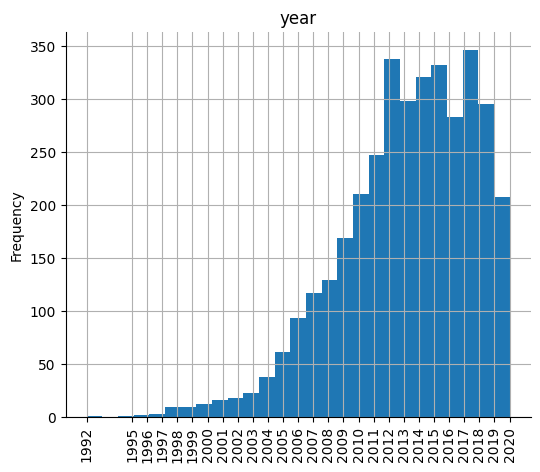

In [19]:
uni_(df,'year')

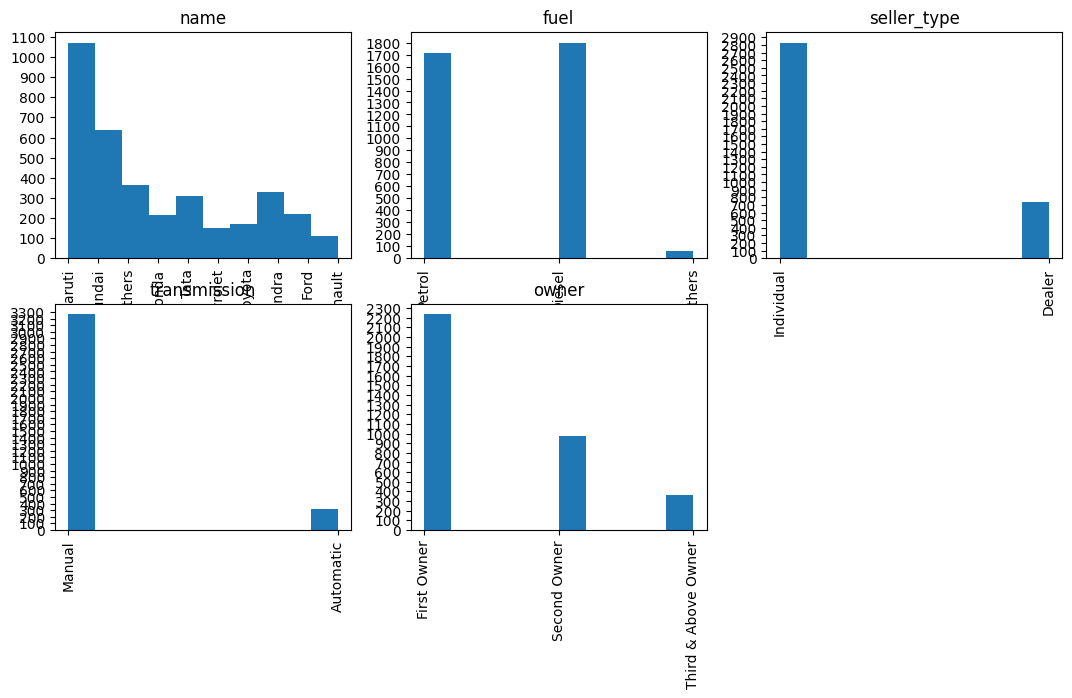

In [20]:
plot_(df, cat_)

### Bivariate analysis

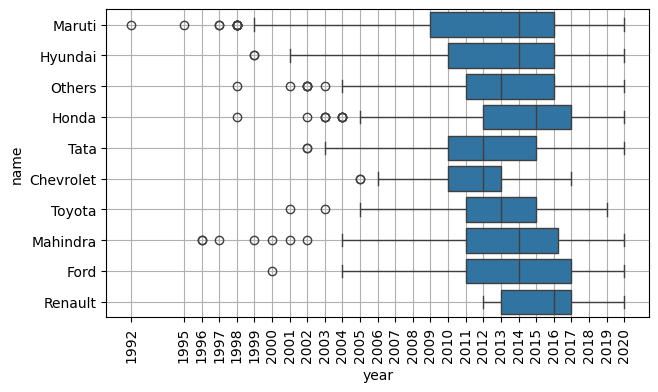

In [21]:
plt.figure(figsize=(7, 4))
sns.boxplot(y='name', x='year', data=df)
plt.xticks(ticks = df['year'].value_counts().index)
plt.xticks(rotation=90)
plt.grid()
plt.show()

In [22]:
def exp_(df,col):
  name_ = df['name'].unique()
  plt.figure(figsize =(20,15))
  for i in range(len(name_)):
    plt.subplot(3,4,i + 1)
    mar_ = df[[col]][df['name'] == name_[i]]         #  sort_values(by = 'model')  #df[df['name'] == name_[i]][['model']]
    x = plt.hist(x = mar_, bins=mar_[col].nunique())
    plt.bar_label(x[2])
    plt.xticks(rotation = 90)
    y = mar_[col].value_counts().index
    plt.xticks(ticks = y , rotation = 90 )
    plt.title(name_[i])
    plt.grid()
  plt.show()
  plt.tight_layout()  # Adjust subplots to fit into figure area

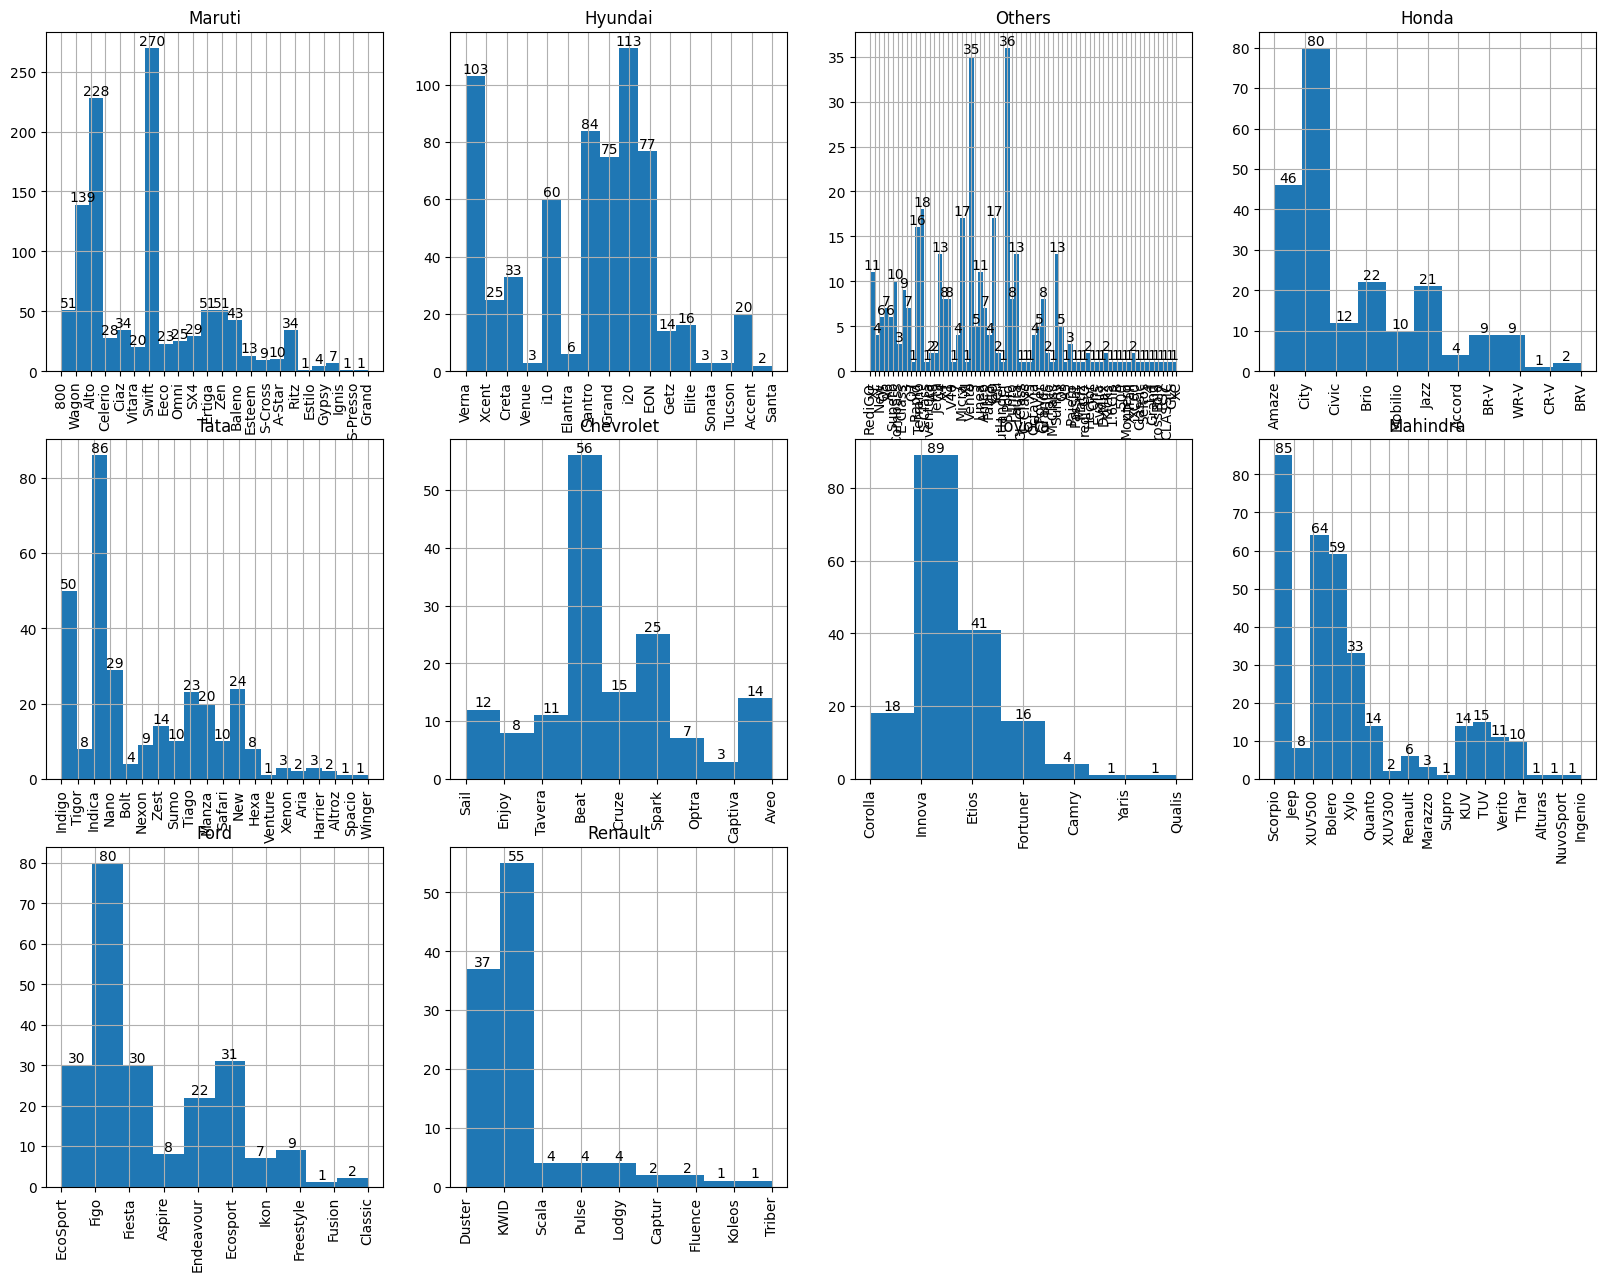

<Figure size 640x480 with 0 Axes>

In [23]:
exp_(df,'model')

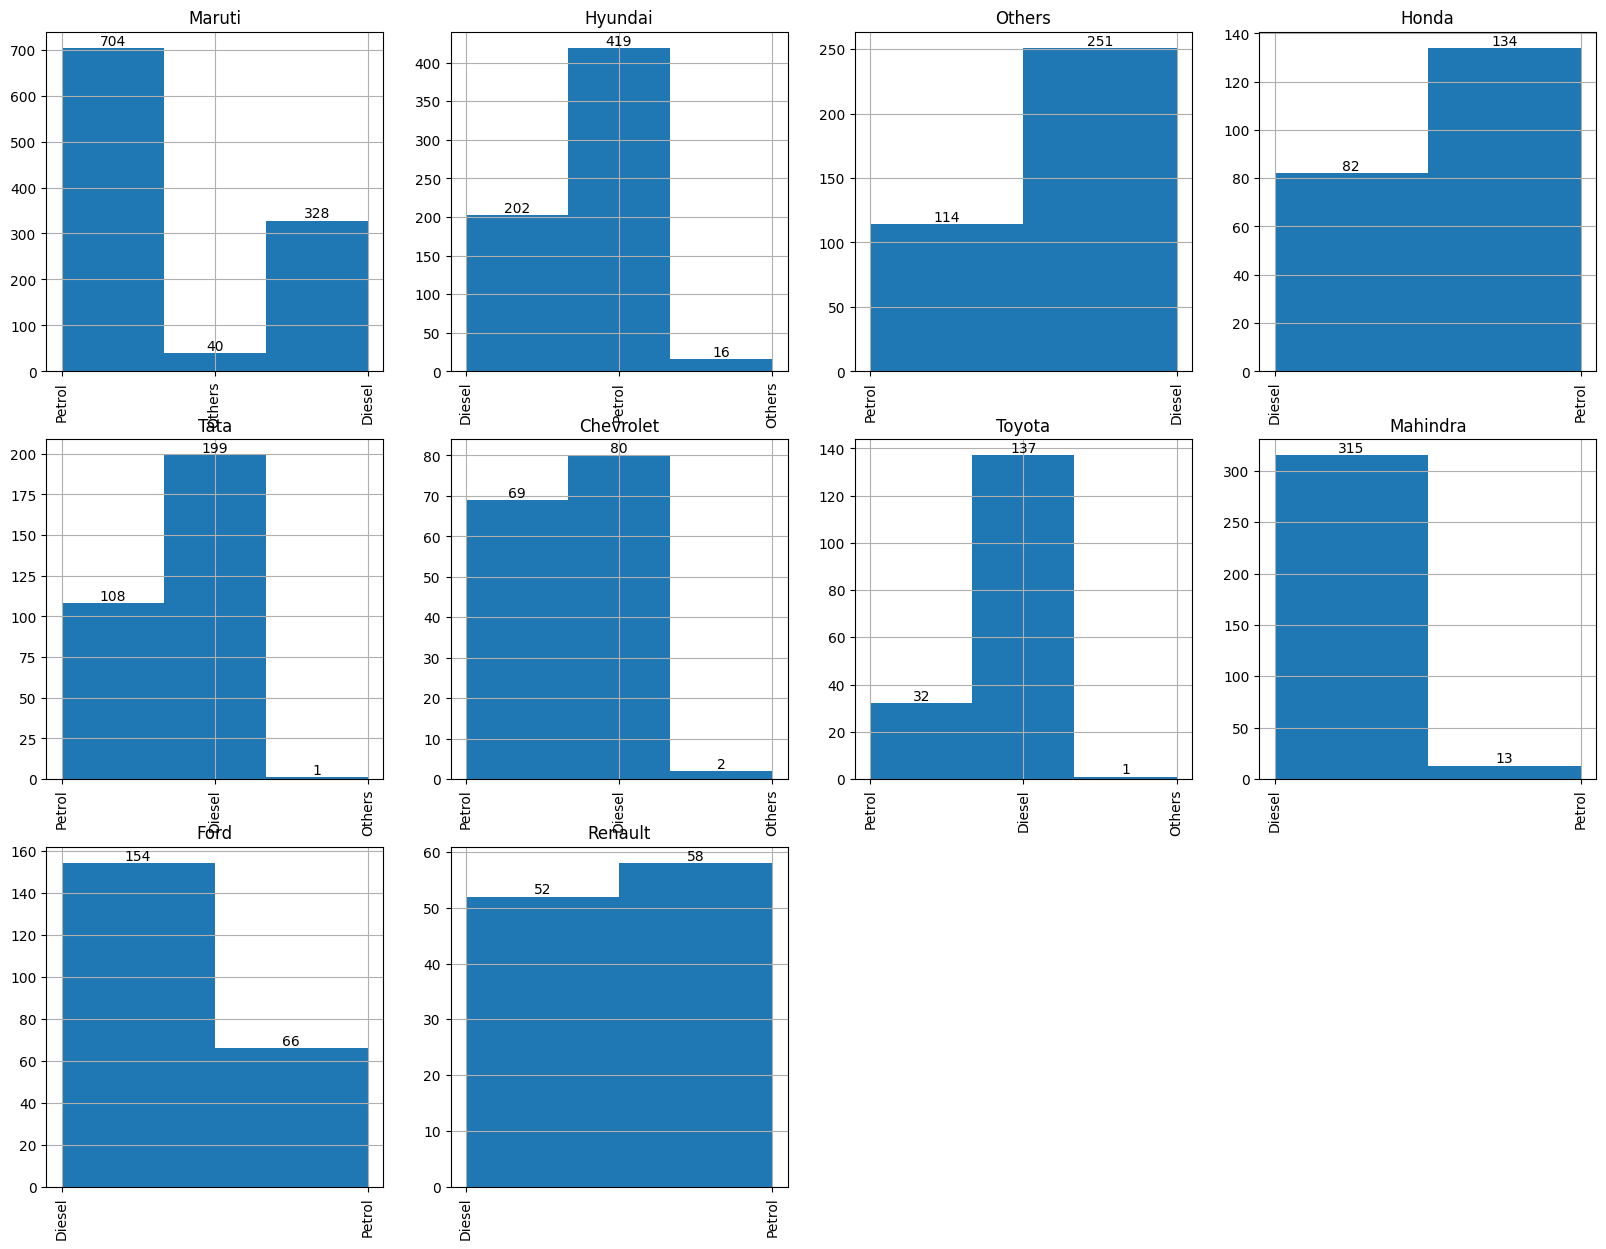

<Figure size 640x480 with 0 Axes>

In [24]:
exp_(df,'fuel')

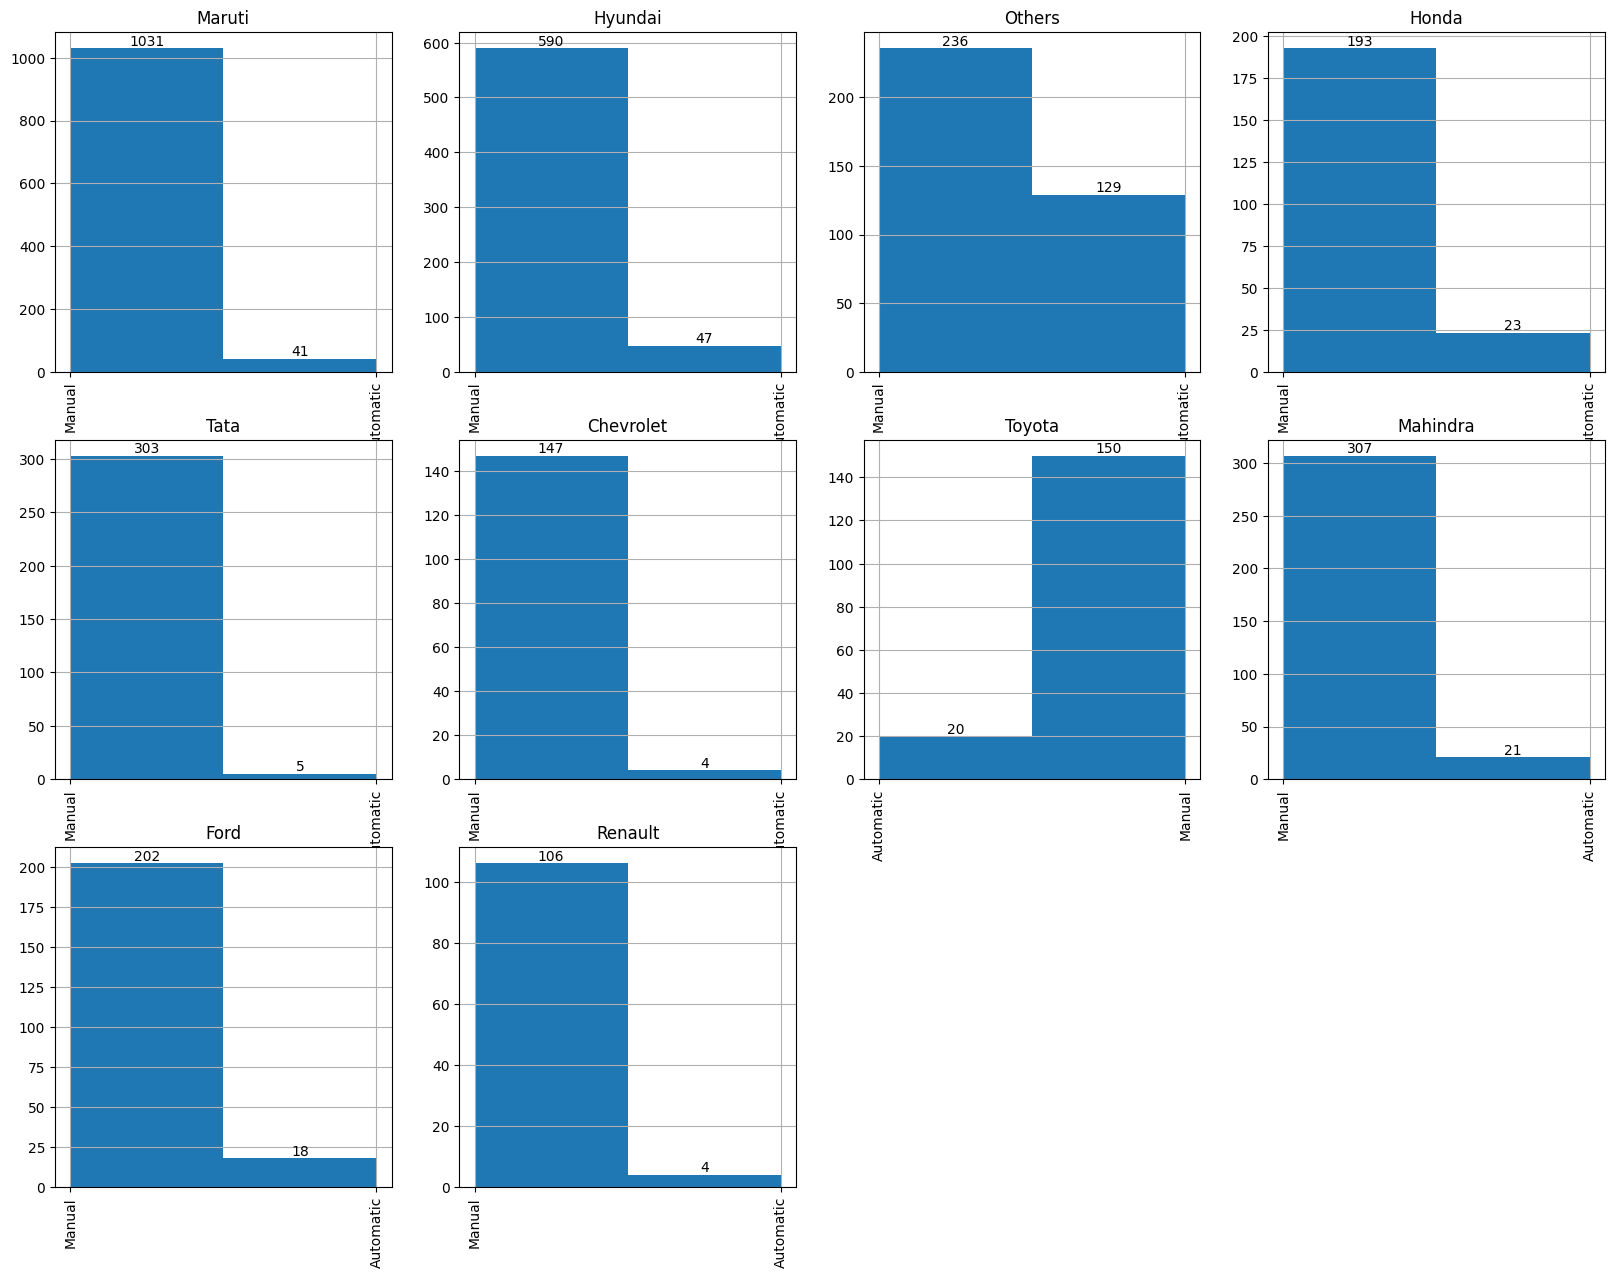

<Figure size 640x480 with 0 Axes>

In [25]:
exp_(df,'transmission')

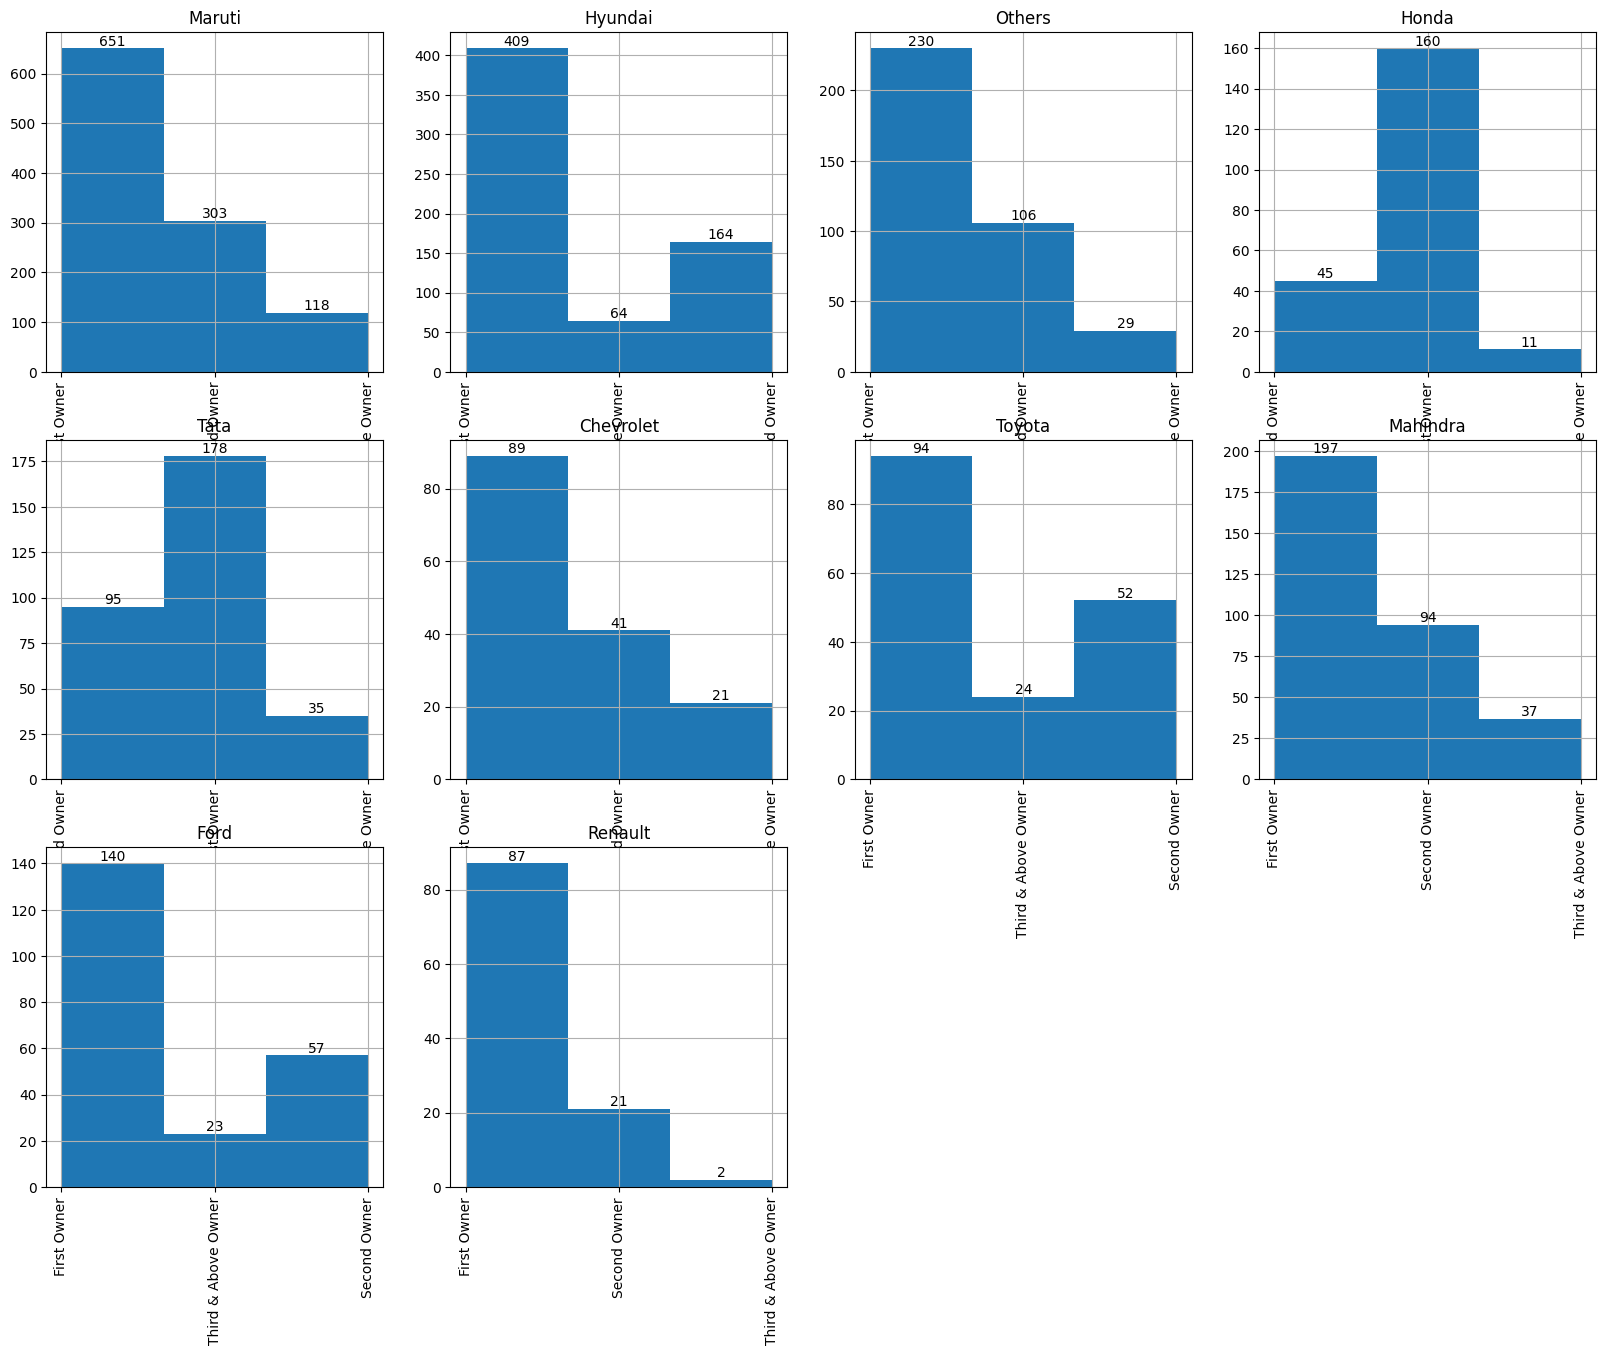

<Figure size 640x480 with 0 Axes>

In [26]:
exp_(df,'owner')

In [27]:
exp_(df,'year')

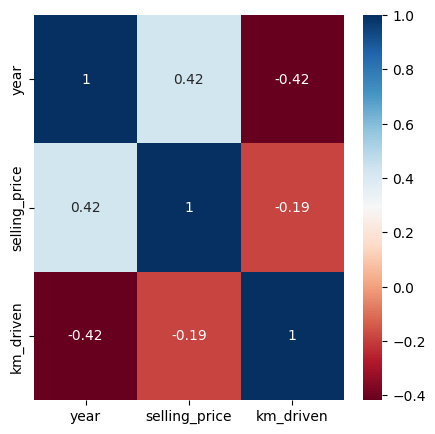

In [ ]:
corr = df[cont_].corr()
plt.figure(figsize=(5,5))
sns.heatmap(corr,annot=True,cmap='RdBu')
plt.show()

*********************************************************************************************************************************************************************

In [26]:
df_1 = df.copy()
# Target Encoding (Mean Encoding)
_mean = df_1.groupby('model')['selling_price'].mean()
df_1['model'] = df_1['model'].map(_mean)
x = df_1.drop('selling_price',axis = 1)
y = df_1['selling_price']


In [23]:
joblib.dump(_mean, 'target_encoding_model.pkl')

['target_encoding_model.pkl']

In [ ]:
df_1.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,model
0,Maruti,2007,60000,70000,Petrol,Individual,Manual,First Owner,83519.607843
1,Maruti,2007,135000,50000,Petrol,Individual,Manual,First Owner,221093.496403
2,Hyundai,2012,600000,100000,Diesel,Individual,Manual,First Owner,525446.533981
3,Others,2017,250000,46000,Petrol,Individual,Manual,First Owner,260454.454545
4,Honda,2014,450000,141000,Diesel,Individual,Manual,Second Owner,497043.434783


In [27]:
# Oversampling dataset to solve issue of under-represented dataset

from sklearn.utils import resample

# Assuming X and y are your features and target variables
x_resampled, y_resampled = resample(x, y, replace=False, n_samples=len(x), random_state=42)

x = pd.concat([x, x_resampled]) # integrting synthatic dataset with original dataset
y = pd.concat([y, y_resampled])

x.shape

(7154, 8)

## Splitting dataset into train and test

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=94)

cont_ = df_1.drop('selling_price',axis = 1).columns[df_1.drop('selling_price', axis=1).dtypes != 'object']
cat_ = df_1.columns[df_1.dtypes == 'object']

## Outlier removal

In [ ]:
def outlier_(df_1,cont_):
  for i in cont_:
      print(f'{i}')
      print(f'{" "}')
      x_,y = df_1[i].quantile(0.25), df_1[i].quantile(0.75)
      iqr = y-x_
      min_ = x_ - 1.5*iqr
      max_= y + 1.5*iqr
      print(f' 25th percentile {x_}, 75th percentile is {y}, IQR is {iqr}')
      print(f" Minimum  is { min_}, Maximum is {max_}")
      print(f' Value below minimum is {(df_1[df_1[i] < min_].shape[0])/(df_1.shape[0])*100:0.0f}% ({df_1[df_1[i] < min_].shape[0]}) and above maximun is {(df_1[df_1[i] > max_].shape[0])/(df_1.shape[0])*100:0.0f}% ({df_1[df_1[i] > max_].shape[0]})')
      print("-"*60)

In [ ]:
outlier_(x_train,cont_)

year
 
 25th percentile 2010.0, 75th percentile is 2016.0, IQR is 6.0
 Minimum  is 2001.0, Maximum is 2025.0
 Value below minimum is 1% (46) and above maximun is 0% (0)
------------------------------------------------------------
km_driven
 
 25th percentile 36000.0, 75th percentile is 90000.0, IQR is 54000.0
 Minimum  is -45000.0, Maximum is 171000.0
 Value below minimum is 0% (0) and above maximun is 3% (143)
------------------------------------------------------------
model
 
 25th percentile 221093.4964028777, 75th percentile is 549699.925, IQR is 328606.4285971223
 Minimum  is -271816.1464928058, Maximum is 1042609.5678956835
 Value below minimum is 0% (0) and above maximun is 4% (225)
------------------------------------------------------------


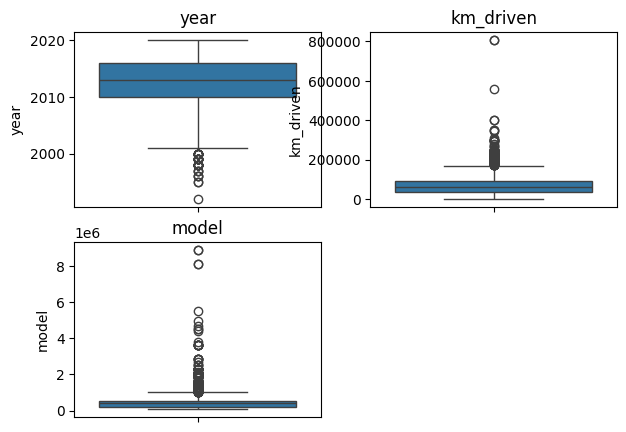

In [ ]:
plt.figure(figsize =(7,5))
for i in range(len(cont_)):
  plt.subplot(2,2,i+1)
  sns.boxplot(x_train[cont_[i]])
  plt.title(cont_[i])

In [ ]:
import joblib
from sklearn.preprocessing import PowerTransformer
yeo_= PowerTransformer(method='box-cox' , standardize= True) # using box-cox transformer to reduce effect of outliers

for i in ['model', 'km_driven']:
    m = yeo_.fit_transform(x_train[[i]].values.reshape(-1, 1))
    n = yeo_.transform(x_test[[i]].values.reshape(-1, 1))

In [ ]:
joblib.dump(yeo_, 'power_transformer_model.pkl')

['power_transformer_model.pkl']

In [ ]:
x_train[i] = m.flatten()
x_test[i] = n.flatten()

In [ ]:
def outlier_remove (df_1,cont_):
  for i in cont_:
      print(f'{i}')
      print(f'{" "}')
      x_,y = df_1[i].quantile(0.25), df_1[i].quantile(0.75)
      iqr = y-x_
      min_ = x_ - 1.5*iqr
      max_= y + 1.5*iqr
      df_1[i] = np.where(df_1[i] < min_,min_,df_1[i])
      df_1[i] = np.where(df_1[i] > max_,max_,df_1[i])

In [ ]:
outlier_remove (x_train,cont_)

for i in cont_:
  x_train[i] = x_train[i].astype(int)
  x_test[i] = x_test[i].astype(int)

year
 
km_driven
 
model
 


Encoding one-hot and ordinal

In [ ]:
one_hot = ['name','fuel','transmission']
ordinal = ['owner']

from sklearn.preprocessing import OrdinalEncoder
ord_ = OrdinalEncoder(categories=[['First Owner', 'Second Owner', 'Third & Above Owner']])
x_train['owner'] = ord_.fit_transform(x_train[['owner']])
x_test['owner'] = ord_.transform(x_test[['owner']])

x_train = pd.get_dummies(x_train, columns= one_hot, drop_first=True, dtype=int)
x_test = pd.get_dummies(x_test, columns= one_hot, drop_first=True, dtype=int)

In [ ]:
x_train.drop('seller_type', axis =1 , inplace = True)
x_test.drop('seller_type', axis = 1 , inplace = True)

# Model Training

In [ ]:
x_train.shape

(5007, 16)

In [ ]:
m_ = x_train
n_ = x_test

In [ ]:
m_ = x_train
m

array([[-0.49377381],
       [-0.7421737 ],
       [-0.27278777],
       ...,
       [-1.46080191],
       [ 0.5587351 ],
       [ 1.11767555]])

In [ ]:
from sklearn.preprocessing import RobustScaler # using RobustScalar because train and testing score is best at it
robust_ = RobustScaler()
x_train_1= robust_.fit_transform(m_)
x_test_1= robust_.transform(n_)

In [ ]:
joblib.dump(robust_ ,'RobustScaler_model.pkl')

['RobustScaler_model.pkl']

### Using PCA to optimise model performance

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
p_train = pca.fit_transform(x_train_1)
p_test = pca.transform(x_test_1)

#### Extracting Eigen Values and Eigen vector
eig_val = pca.explained_variance_   # eigen_values
eig_vec = pca.components_

[30.39656694071927, 20.622215155874297, 10.585119714749206, 7.434677689464304, 6.851745963327133, 5.470548682704377, 3.9802718673844897, 3.2077896085685653, 2.6659701136598875, 2.1811019530350317, 1.8685187793919127, 1.7111896765816557, 1.425003379026412, 1.0102665448422112, 0.4598637812672022, 0.12915014940402808]


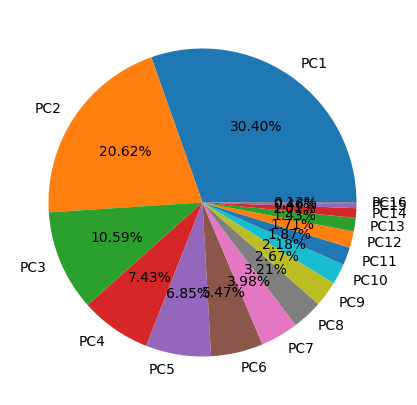

In [ ]:
total = sum(eig_val)
var_eig_val = [(i/total)*100 for i in eig_val]
print(var_eig_val)

plt.figure(figsize=(5,5))
plt.pie(eig_val,labels=['PC'+str(i) for i in range(1,17)],autopct='%0.2f%%')
plt.show()

In [ ]:
cum_var_eig_values = np.array(var_eig_val).cumsum()
print(cum_var_eig_values)

[ 30.39656694  51.0187821   61.60390181  69.0385795   75.89032546
  81.36087415  85.34114601  88.54893562  91.21490574  93.39600769
  95.26452647  96.97571615  98.40071952  99.41098607  99.87084985
 100.        ]


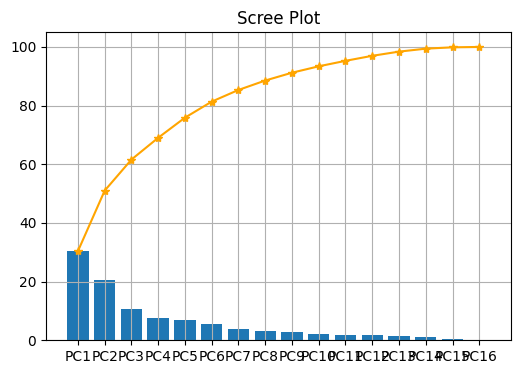

In [ ]:
plt.figure(figsize=(6,4))
PCs = ['PC'+str(i) for i in range(1,17)]
plt.bar(PCs,var_eig_val,label='Var_In_Eigen_Values')
plt.plot(PCs,cum_var_eig_values,label='CumSum_Var_In_Eien_Values',marker='*',color='orange')
plt.title('Scree Plot')
plt.grid()
plt.show()

In [ ]:
pca_xtrain = pd.DataFrame(p_train, columns = x_train.columns)
pca_xtest = pd.DataFrame(p_test, columns = x_train.columns)
pca_xtest

,year,km_driven,owner,model,name_Ford,name_Honda,name_Hyundai,name_Mahindra,name_Maruti,name_Others,name_Renault,name_Tata,name_Toyota,fuel_Others,fuel_Petrol,transmission_Manual
0,0.604209,1.828579,-0.532304,0.034563,0.817317,0.030439,0.333346,0.383368,-0.015897,0.057829,-0.284001,-0.460297,-0.389527,0.069355,0.043709,0.020357
1,-1.284234,0.037051,1.076909,0.160679,-0.178838,-0.134210,0.848483,0.350852,0.292708,0.132282,-0.263377,-0.395428,-0.126472,-0.070176,0.028010,-0.026578
2,-1.531737,-0.747234,0.127465,-0.437137,0.338139,0.092585,-0.057840,0.022463,0.059339,0.008045,0.016928,0.009250,0.037327,-0.009812,-0.035372,-0.020025
3,-0.827774,-0.992046,-0.594375,-0.375263,0.526571,0.126692,-0.079962,0.019201,0.065051,0.009070,0.037532,-0.009549,0.034390,-0.026551,-0.031221,-0.019839
4,0.439109,0.026396,-0.486400,0.133469,-0.364307,0.279486,0.015283,-0.007645,-0.008434,0.210093,-0.123520,-0.014490,0.317506,0.926863,-0.030991,-0.051349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2142,1.555204,1.160658,0.019776,-0.080081,0.181881,0.098976,0.035373,-0.188006,0.643982,-0.500409,0.543719,0.450495,0.121192,0.003784,0.016824,0.005174
2143,1.072495,0.032722,-0.059624,0.505482,0.149027,-1.006923,-0.232064,-0.057765,-0.054089,-0.110068,0.015788,-0.192930,-0.188144,0.005523,0.039103,0.019377
2144,-1.101056,-0.110133,0.011461,0.354325,-0.579075,0.802465,0.143225,-0.036150,-0.521050,-0.394430,0.055291,0.062651,-0.048063,-0.012771,-0.045034,-0.029937
2145,-0.462061,-0.191477,-0.002947,0.178152,-1.175146,0.382992,0.303581,-0.030802,-0.483304,-0.395559,0.061136,0.045685,-0.052881,-0.053935,-0.040557,-0.028886


In [ ]:
x_train = pca_xtrain
x_test = pca_xtest
x_test.head()

,year,km_driven,owner,model,name_Ford,name_Honda,name_Hyundai,name_Mahindra,name_Maruti,name_Others,name_Renault,name_Tata,name_Toyota,fuel_Others,fuel_Petrol,transmission_Manual
0,0.604209,1.828579,-0.532304,0.034563,0.817317,0.030439,0.333346,0.383368,-0.015897,0.057829,-0.284001,-0.460297,-0.389527,0.069355,0.043709,0.020357
1,-1.284234,0.037051,1.076909,0.160679,-0.178838,-0.134210,0.848483,0.350852,0.292708,0.132282,-0.263377,-0.395428,-0.126472,-0.070176,0.028010,-0.026578
2,-1.531737,-0.747234,0.127465,-0.437137,0.338139,0.092585,-0.057840,0.022463,0.059339,0.008045,0.016928,0.009250,0.037327,-0.009812,-0.035372,-0.020025
3,-0.827774,-0.992046,-0.594375,-0.375263,0.526571,0.126692,-0.079962,0.019201,0.065051,0.009070,0.037532,-0.009549,0.034390,-0.026551,-0.031221,-0.019839
4,0.439109,0.026396,-0.486400,0.133469,-0.364307,0.279486,0.015283,-0.007645,-0.008434,0.210093,-0.123520,-0.014490,0.317506,0.926863,-0.030991,-0.051349


In [ ]:
x_train.columns

Index(['year', 'km_driven', 'owner', 'model', 'name_Ford', 'name_Honda',
       'name_Hyundai', 'name_Mahindra', 'name_Maruti', 'name_Others',
       'name_Renault', 'name_Tata', 'name_Toyota', 'fuel_Others',
       'fuel_Petrol', 'transmission_Manual'],
      dtype='object')

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=7)
knn.fit(x_train, y_train)
print('Train_Score',knn.score(x_train,y_train))  # Train R2_Score
print('Test_Score',knn.score(x_test,y_test))     # Test R2_Score

Train_Score 0.8246629256300864
Test_Score 0.8231054851707269


In [ ]:
from sklearn.metrics import *
def eval_model(y_test,y_pred):
    mae =  mean_absolute_error(y_test,y_pred)
    mse =  mean_squared_error(y_test,y_pred)
    rmse = np.sqrt(mse)
    r2 =   r2_score(y_test,y_pred)
    print('MAE',mae)
    print('MSE',mse)
    print('RMSE',rmse)
    print('R2_Score',r2)

In [ ]:
y_pred = knn.predict(x_test)
eval_model(y_test,y_pred)

MAE 101767.74742165147
MSE 45439198265.08824
RMSE 213164.72096735012
R2_Score 0.8231054851707269


#### Saving model and evaluationg on new data

In [ ]:
import joblib

joblib.dump(knn,'knn_model.pkl')

['knn_model.pkl']

In [ ]:
loaded_model = joblib.load('knn_model.pkl')
type(knn)

sklearn.neighbors._regression.KNeighborsRegressor

# Selecting random 20 data to check result

In [ ]:
x_train

,year,km_driven,owner,model,name_Ford,name_Honda,name_Hyundai,name_Mahindra,name_Maruti,name_Others,name_Renault,name_Tata,name_Toyota,fuel_Others,fuel_Petrol,transmission_Manual
0,-0.029017,-0.171034,-0.297898,0.266963,0.589144,-0.048389,0.204967,-0.405047,-0.151515,0.088166,-0.094898,-0.371152,0.820449,-0.300485,0.017543,-0.049648
1,0.040081,-0.939472,-0.547752,-0.606840,-0.071982,-0.390268,0.087648,-0.004917,0.080774,-0.011194,0.041890,-0.052847,-0.002794,-0.059018,-0.017390,-0.011908
2,0.659086,-0.193422,-0.226862,-0.738583,0.418030,-0.529768,-0.010854,-0.158495,-0.062460,-0.107045,0.029443,-0.171750,-0.162465,0.019681,0.026157,0.022010
3,-0.711374,-0.084386,1.063409,-0.890392,-0.480129,-0.744159,0.158447,-0.079323,0.010251,-0.065987,-0.003172,-0.088460,-0.086252,-0.003279,0.000254,0.006709
4,0.394569,1.656587,0.849874,-0.031230,0.705574,0.360902,-0.256558,-0.352012,-0.455794,0.636109,0.443276,-0.157908,-0.387856,0.088479,0.039607,0.021579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5002,-1.164455,-0.510295,0.204890,0.300953,0.028010,0.045662,0.290589,-0.188591,0.108684,0.113279,-0.009283,-0.038187,0.138372,0.013280,-0.001115,0.291461
5003,-0.470068,-0.744896,0.159340,-0.723355,-0.474291,-0.559876,0.166274,0.004887,0.092084,-0.009624,0.023620,-0.036018,0.003485,-0.058439,-0.021398,-0.012795
5004,-0.040580,-1.449217,0.042313,-0.427377,0.399058,0.328608,-0.153518,0.011199,0.035377,-0.013822,-0.018533,-0.036097,0.054742,-0.040733,-0.036190,-0.013226
5005,-0.665755,-0.718669,-0.508137,0.419905,0.421256,0.217850,0.213785,-0.195556,0.100024,0.113482,0.009217,-0.052817,0.135047,0.011245,0.002087,0.291720


In [ ]:
new_data = x_train.sample(1)
new_data.head()

,year,km_driven,owner,model,name_Ford,name_Honda,name_Hyundai,name_Mahindra,name_Maruti,name_Others,name_Renault,name_Tata,name_Toyota,fuel_Others,fuel_Petrol,transmission_Manual
2269,-0.779259,0.271254,1.269196,0.489586,-0.211875,-0.883292,-0.20454,0.004246,-0.024682,-0.075997,-0.022728,-0.105337,-0.121122,0.023375,0.01307,0.006006


In [ ]:
new_data.columns

Index(['year', 'km_driven', 'owner', 'model', 'name_Ford', 'name_Honda',
       'name_Hyundai', 'name_Mahindra', 'name_Maruti', 'name_Others',
       'name_Renault', 'name_Tata', 'name_Toyota', 'fuel_Others',
       'fuel_Petrol', 'transmission_Manual'],
      dtype='object')

In [ ]:
predictions = loaded_model.predict(new_data)
predictions

array([254999.85714286])

In [ ]:
# import streamlit as st
# fuel = st.selectbox('Fuel Type', ['Petrol', 'Diesel', 'Others'])
# fuel_options = ['Petrol', 'Diesel', 'Others']
# fuel_encoded = pd.DataFrame([[0, 0, 0]], columns=fuel_options)
# fuel_encoded

In [ ]:
# fuel_encoded.loc[0, fuel] = 1

In [ ]:
# fuel_encoded